In [1]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [2]:
# download nltk corpus (first time only)
# import nltk

# nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/karolstudniarek/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/karolstudniarek/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/karolstudniarek/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/karolstudniarek/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /Users/karolstudniarek/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to
[nltk_da

True

In [10]:
f = open('InsideTheFight.txt', 'r').read()

Tokenization is a text preprocessing step in sentiment analysis that involves breaking down the text into individual words or tokens. This is an essential step in analyzing text data as it helps to separate individual words from the raw text, making it easier to analyze and understand. Tokenization is typically performed using NLTK's built-in `word_tokenize` function, which can split the text into individual words and punctuation marks.

In [13]:
# Tokenize the text
tokens = word_tokenize(f.lower())
print(tokens)
print(len(tokens))

['in', 'a', 'bunker', 'just', 'outside', 'the', 'city', 'limits', 'of', 'bakhmut', ',', 'ukraine', "'s", '77th', 'brigade', 'direct', 'artillery', 'fire', 'to', 'support', 'their', 'infantry', '-', 'their', 'last', 'line', 'of', 'defence', 'on', 'the', 'western', 'edge', 'of', 'the', 'city', '.', 'ukraine', 'is', 'still', 'clinging', 'to', 'the', 'last', 'few', 'streets', 'here', '.', 'but', 'the', 'live', 'video', 'feed', 'the', 'artillery', 'gunners', 'watch', 'intently', ',', 'from', 'a', 'drone', 'flying', 'above', 'the', 'city', ',', 'suggests', 'that', 'even', 'if', 'russia', 'can', 'finally', 'wrestle', 'control', ',', 'it', 'would', 'be', 'little', 'more', 'than', 'a', 'pyrrhic', 'victory', '.', 'the', 'prize', 'is', 'now', 'a', 'crumpled', ',', 'skeletal', 'city', '-', 'with', 'hardly', 'a', 'building', 'left', 'unscathed', ',', 'and', 'with', 'its', 'entire', 'population', 'vanished', '.', 'the', 'battle', 'for', 'the', 'eastern', 'ukrainian', 'city', 'of', 'bakhmut', 'has', 

In [35]:
# Remove stop words

filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]
print(filtered_tokens)
print(len(filtered_tokens))

['bunker', 'outside', 'city', 'limits', 'bakhmut', ',', 'ukraine', "'s", '77th', 'brigade', 'direct', 'artillery', 'fire', 'support', 'infantry', '-', 'last', 'line', 'defence', 'western', 'edge', 'city', '.', 'ukraine', 'still', 'clinging', 'last', 'streets', '.', 'live', 'video', 'feed', 'artillery', 'gunners', 'watch', 'intently', ',', 'drone', 'flying', 'city', ',', 'suggests', 'even', 'russia', 'finally', 'wrestle', 'control', ',', 'would', 'little', 'pyrrhic', 'victory', '.', 'prize', 'crumpled', ',', 'skeletal', 'city', '-', 'hardly', 'building', 'left', 'unscathed', ',', 'entire', 'population', 'vanished', '.', 'battle', 'eastern', 'ukrainian', 'city', 'bakhmut', 'longest', 'bloodiest', 'war', 'far', '.', 'western', 'officials', 'estimate', '20,000', '30,000', 'russian', 'troops', 'killed', 'wounded', ',', 'ukraine', "'s", 'military', 'also', 'paid', 'heavy', 'price', '-', 'still', "n't", '.', 'plumes', 'smoke', 'still', 'hang', 'heavy', 'besieged', 'city', ',', 'accompanied', 

In [39]:
extended_stop_words = [".", ",", "'s", "n't", "’", "``", "''", "“", "”", "—", "–", "‘", "''", "``"]

In [40]:
# Remove stop words 2
filtered_tokens = [token for token in filtered_tokens if token not in extended_stop_words]
print(filtered_tokens)
print(len(filtered_tokens))


['bunker', 'outside', 'city', 'limits', 'bakhmut', 'ukraine', '77th', 'brigade', 'direct', 'artillery', 'fire', 'support', 'infantry', '-', 'last', 'line', 'defence', 'western', 'edge', 'city', 'ukraine', 'still', 'clinging', 'last', 'streets', 'live', 'video', 'feed', 'artillery', 'gunners', 'watch', 'intently', 'drone', 'flying', 'city', 'suggests', 'even', 'russia', 'finally', 'wrestle', 'control', 'would', 'little', 'pyrrhic', 'victory', 'prize', 'crumpled', 'skeletal', 'city', '-', 'hardly', 'building', 'left', 'unscathed', 'entire', 'population', 'vanished', 'battle', 'eastern', 'ukrainian', 'city', 'bakhmut', 'longest', 'bloodiest', 'war', 'far', 'western', 'officials', 'estimate', '20,000', '30,000', 'russian', 'troops', 'killed', 'wounded', 'ukraine', 'military', 'also', 'paid', 'heavy', 'price', '-', 'still', 'plumes', 'smoke', 'still', 'hang', 'heavy', 'besieged', 'city', 'accompanied', 'relentless', 'rumble', 'artillery', 'fire', 'russia', 'trying', 'capture', 'bakhmut', 'm

In [41]:
# Lemmatize the tokens

lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
print(lemmatized_tokens)
print(len(lemmatized_tokens))


['bunker', 'outside', 'city', 'limit', 'bakhmut', 'ukraine', '77th', 'brigade', 'direct', 'artillery', 'fire', 'support', 'infantry', '-', 'last', 'line', 'defence', 'western', 'edge', 'city', 'ukraine', 'still', 'clinging', 'last', 'street', 'live', 'video', 'feed', 'artillery', 'gunner', 'watch', 'intently', 'drone', 'flying', 'city', 'suggests', 'even', 'russia', 'finally', 'wrestle', 'control', 'would', 'little', 'pyrrhic', 'victory', 'prize', 'crumpled', 'skeletal', 'city', '-', 'hardly', 'building', 'left', 'unscathed', 'entire', 'population', 'vanished', 'battle', 'eastern', 'ukrainian', 'city', 'bakhmut', 'longest', 'bloodiest', 'war', 'far', 'western', 'official', 'estimate', '20,000', '30,000', 'russian', 'troop', 'killed', 'wounded', 'ukraine', 'military', 'also', 'paid', 'heavy', 'price', '-', 'still', 'plume', 'smoke', 'still', 'hang', 'heavy', 'besieged', 'city', 'accompanied', 'relentless', 'rumble', 'artillery', 'fire', 'russia', 'trying', 'capture', 'bakhmut', 'month',

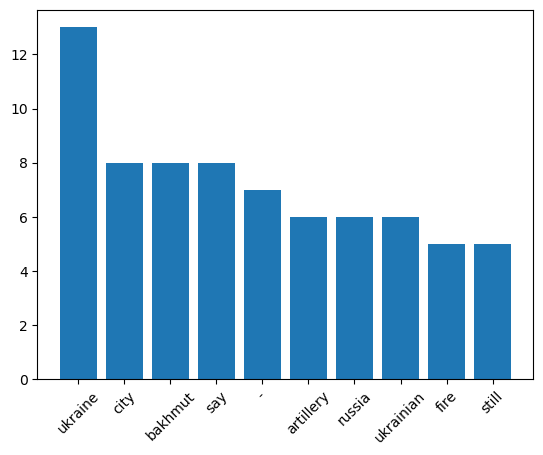

In [42]:
from collections import Counter
import matplotlib.pyplot as plt


word_counter = Counter(lemmatized_tokens)
top_words = word_counter.most_common(10)

plt.bar([x[0] for x in top_words], [x[1] for x in top_words])
plt.xticks(rotation=45)
plt.show()


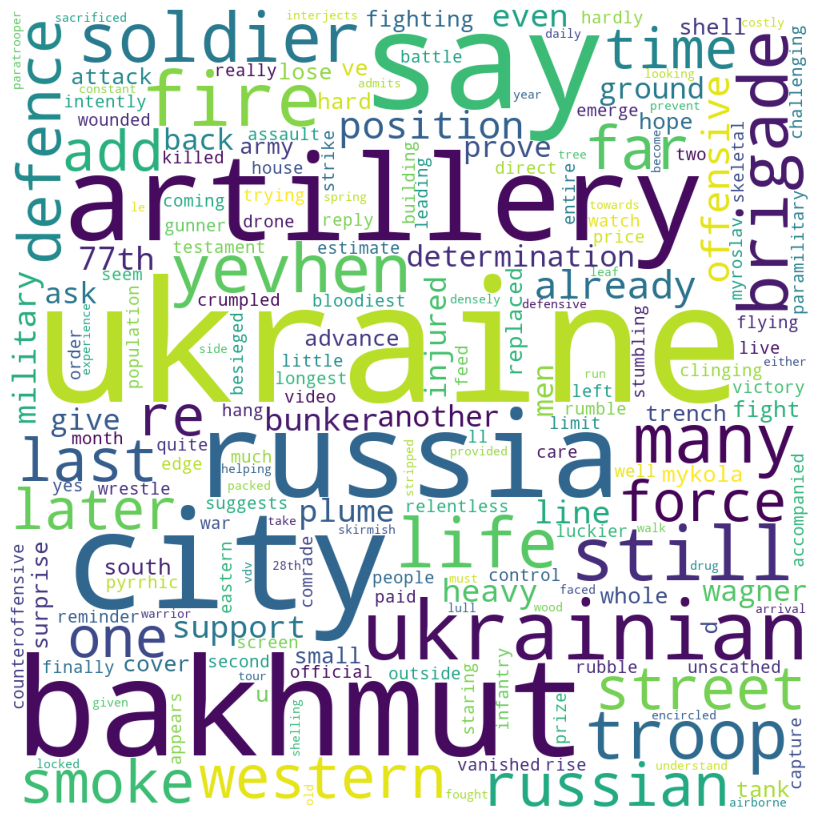

In [43]:
from wordcloud import WordCloud


word_cloud = WordCloud(width=1000, height=1000,
                       background_color='white', min_font_size=10).generate(' '.join(lemmatized_tokens))

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
